In [ ]:
# problem 2 Financial Condition of Banks.
#The file Banks.xls includes data on a sample of 20 banks.
#The “Financial Condition” column records the judgment of an expert on the financial condition of each bank.
#This dependent variable takes one of two possible values— weak or strong —according to the financial condition of the bank.
#The predictors are two ratios used in the financial analysis of banks:
#TotLns&Lses/Assets is the ratio of total loans and leases to total assets and TotExp/Assets is the ratio of total expenses to total assets.
#The target is to use the two ratios for classifying the financial condition of a new bank.
#Run a logistic regression (on the entire dataset) that models the status of a bank as a function of the two financial measures provided.
#Specify the success class as weak (this is similar to creating a dummy that is 1 for financially weak banks and 0 otherwise), and use the default cutoff value of 0.5.

In [ ]:
pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 49.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error
import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import classificationSummary
#from dmba import
from dmba.metric import AIC_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [132]:
finance_banks = dmba.load_data('banks.csv')
finance_banks.columns = [c.replace(' ', '_') for c in finance_banks.columns]
finance_banks.columns = [c.lower() for c in finance_banks.columns]
finance_round = [c for c in finance_banks.values]
df = pd.DataFrame(finance_banks)
finance_banks.drop(columns=['obs','totcap/assets'], inplace=True)
finance_banks.shape
finance_banks

,financial_condition,totexp/assets,totlns&lses/assets
0,1,0.12,0.65
1,1,0.11,0.62
2,1,0.09,1.02
3,1,0.10,0.67
4,1,0.11,0.69
5,1,0.13,0.74
6,1,0.10,0.79
7,1,0.13,0.63
8,1,0.16,0.72
9,1,0.16,0.57


In [137]:
y = finance_banks['financial_condition']
indep_var = ['totlns&lses/assets','totexp/assets'] #ratio of total loans and leases to total assets, ratio of total expenses to total assets
X = finance_banks[indep_var]
# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [191]:
# a. Write the estimated equation that associates the financial condition of a bank
#with its two predictors in three #formats:
#i. The logit as a function of the predictors

#ii. The odds as a function of the predictors

#iii. The probability as a function of the predictors

logit_reg = LogisticRegression()
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print(logit_reg.coef_)
#print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  0.36706717102966685
       totlns&lses/assets  totexp/assets
coeff            0.040993       0.105735
[[0.0409928  0.10573499]]


In [189]:
# Predict to get the probabilities
# The probability,odds,logit as a function of the predictors
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y,
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'logit': np.log(logit_reg_proba[:, 1] / logit_reg_proba[:, 0]),

                             'predicted': logit_reg_pred })

logit_result

,actual,p(0),p(1),logit,predicted
15,0,0.403987,0.596013,0.388881,1
10,0,0.402959,0.597041,0.393153,1
3,1,0.400086,0.599914,0.405106,1
18,0,0.402860,0.597140,0.393563,1
17,0,0.401013,0.598987,0.401244,1
14,0,0.399750,0.600250,0.406508,1
16,0,0.402367,0.597633,0.395612,1
4,1,0.399636,0.600364,0.406983,1
2,1,0.396901,0.603099,0.418396,1
6,1,0.398906,0.601094,0.410025,1


In [136]:
# Calculate logit
# a-i. The logit as a function of the predictors
logit = np.log(logit_reg_proba[:, 1] / logit_reg_proba[:, 0])
print(logit)

[ 0.02031481 -0.03877203  0.05780112 -0.05751518  0.12822117  0.03762927
  0.02799122 -0.0157428 ]


In [129]:
# a-iii. The probability as a function of the predictors
probability_from_logit = 1 / (1 + np.exp(-logit))
print(probability_from_logit)

[0.50507853 0.49030821 0.51444626 0.48562517 0.53201145 0.50940621
 0.50699735 0.49606438]


In [182]:
# a-ii. The odds as a function of the predictors
# odds = p / (1 - p)
odds = np.exp(logit)

print(odds)

[1.02052256 0.96196998 1.05950426 0.94410755 1.1368044  1.03834622
 1.02838666 0.98438047]


In [192]:
# 2b Consider a new bank whose total loans and leases/assets ratio = 0.6 and total expenses/assets ratio = 0.11.
#From your logistic regression model, estimate the following four quantities for this bank
#(use R to do all the intermediate calculations; show your final answers to four decimal places):

#the logit as a function of the predictors

intercept = 0.36706717102966685
beta_1 = 0.0409928
beta_2 = 0.10573499
leases_assets = 0.6
expenses_assets = 0.11
logit = intercept + beta_1 * leases_assets + beta_2 * expenses_assets
logit

0.40329369992966685

In [194]:
#the odds as a function of the predictors
odds = np.exp(logit)
odds

1.4967464214341961

In [196]:
# the probability as a function of the predictors
probability = odds / (1 + odds)
probability

0.5994787490571134

In [197]:
# the classification of the bank (use cutoff = 0.5).
classification = "Financially Weak" if probability >= 0.5 else "Not Financially Weak"
print(f"Logit: {logit:.4f}")
print(f"Odds: {odds:.4f}")
print(f"Probability: {probability:.4f}")
print(f"Classification: {classification}")

Logit: 0.4033
Odds: 1.4967
Probability: 0.5995
Classification: Financially Weak


In [200]:
# 2c Threshold Based on Odds with cutoff 0.5
# The classification threshold for odds can be derived from the probability threshold. Since the cutoff value for probability is 0.5

proba_cutoff = 0.5
# Calculate the threshold for odds
threshold_odds = proba_cutoff / (1 - proba_cutoff)
# Calculate the threshold for logit
threshold_logit = np.log(threshold_odds)
print(threshold_odds)
print(threshold_logit)

1.0
0.0


In [205]:
# Calculate the odds ratio using beta_1 value which is total loans and leases/assets coefficients
leases_assets_odds_ratio = np.exp(beta_1)
print(f"Odds Ratio: {leases_assets_odds_ratio:}")

#interpretation
interpretation = f"A one-unit increase in the total loans and leases to total assets ratio is associated with a {leases_assets_odds_ratio:.4f} times change in the odds of being financially weak."
print(f"Interpretation: {interpretation:}")
# This means that as the ratio increases by one unit, the odds of the bank being financially weak are multiplied by 1.0418, indicating a higher likelihood of financial weakness with increasing total loans and leases relative to assets.

Odds Ratio: 1.0418446042373244
Interpretation: A one-unit increase in the total loans and leases to total assets ratio is associated with a 1.0418 times change in the odds of being financially weak.


In [206]:
#define metrics
y_pred_proba = logit_reg.predict_proba(valid_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(valid_y,  y_pred_proba)

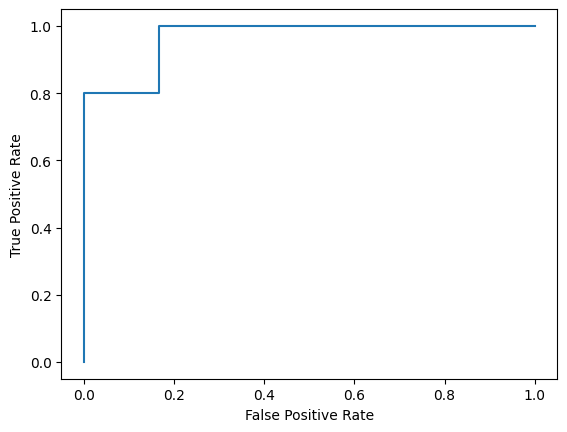

In [207]:
#create ROC curve\
# When a bank that is in poor financial condition is misclassified as financially strong,
#the misclassification cost is much higher than when a financially strong bank is misclassified as weak.
#To minimize the expected cost of misclassification,
#should the cutoff value for classification (which is currently at 0.5) be increased or decreased?
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#To minimize the expected cost of misclassification when the cost of classifying a financially weak bank as financially strong is much higher,
#you should decrease the cutoff value from 0.5 to a lower value.